# 测试 TensorFlow/Keras YOLO格式档

In [1]:
# 载入套件
from yolo_keras_utils import *
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import ZeroPadding2D
from tensorflow.keras.layers import UpSampling2D
from tensorflow.keras.layers import add, concatenate
from tensorflow.keras.models import Model

In [2]:
# 测试
from tensorflow.keras.models import load_model

image_filename = './images_Object_Detection/zebra.jpg' # 测试图像

model = load_model('./yolov3.h5')   # 载入模型
input_w, input_h = 416, 416      # YOLO v3 图像尺寸
# 载入图像，并缩放尺寸为 (416, 416)
image, image_w, image_h = load_image_pixels(image_filename, (input_w, input_h))
# 预测图像
yhat = model.predict(image)
# 传回侦测的物件资讯
print([a.shape for a in yhat])

[(1, 13, 13, 255), (1, 26, 26, 255), (1, 52, 52, 255)]


In [3]:
# 输出转换
# 每个阵列内前两个值为grid宽/高，后四个为 anchors 的作标与尺寸
anchors = [[116,90, 156,198, 373,326], [30,61, 62,45, 59,119], [10,13, 16,30, 33,23]]

# 设定物件侦测的机率门槛
class_threshold = 0.6

# 依 anchors 的尺寸及机率门槛筛选 Bounding Box
boxes = list()
for i in range(len(yhat)):
    boxes += decode_netout(yhat[i][0], anchors[i], class_threshold, input_h, input_w)
    
# 依原图尺寸与缩放尺寸的比例， 校正 Bounding Box 尺寸
correct_yolo_boxes(boxes, image_h, image_w, input_h, input_w)

#  使用 non-maximal suppress，移除重叠的 Bounding Box
do_nms(boxes, 0.5)

Bounding Box 个数：3
类别：zebra, 机率：94.91060376167297
类别：zebra, 机率：99.86329674720764
类别：zebra, 机率：96.8708872795105


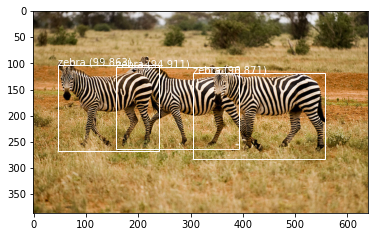

In [4]:
# 取得 Bounding Box 资讯：座标、类别、机率
v_boxes, v_labels, v_scores = get_boxes(boxes, labels, class_threshold)

# 显示执行结果
print(f'Bounding Box 个数：{len(v_boxes)}')
for i in range(len(v_boxes)):
    print(f'类别：{v_labels[i]}, 机率：{v_scores[i]}')

# 绘图
draw_boxes(image_filename, v_boxes, v_labels, v_scores)